In [2]:
from google.colab import drive
drive.mount("/content/gdirve")

Mounted at /content/gdirve


In [ ]:
!unzip "/content/gdirve/MyDrive/gdriveupmebot/archive.zip" -d "/tmp/Data"

In [38]:
import os
import numpy as np
from matplotlib.image import imread
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, RocCurveDisplay
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
train_dir="/tmp/Data/train/train"
test_dir="/tmp/Data/test/test"

In [6]:
for pic in os.listdir(train_dir):
  print(pic+": "+ str(len(os.listdir(train_dir+"/"+pic))))

2: 900
4: 900
18: 900
15: 900
6: 900
3: 900
1: 900
0: 900
12: 900
11: 900
8: 900
19: 900
9: 900
5: 900
16: 900
14: 900
10: 900
17: 900
13: 900
7: 900


In [7]:
for pic in os.listdir(test_dir):
  print(pic+": "+ str(len(os.listdir(test_dir+"/"+pic))))

2: 300
4: 300
18: 300
15: 300
6: 300
3: 300
1: 300
0: 300
12: 300
11: 300
8: 300
19: 300
9: 300
5: 300
16: 300
14: 300
10: 300
17: 300
13: 300
7: 300


In [8]:
print("train data is: "+str(900*20))
print("test data is: "+str(300*20))

train data is: 18000
test data is: 6000


In [9]:
sample_pic=Image.open(train_dir+"/7/"+"406.jpg")

In [10]:
sample_pic.size

(50, 50)

In [11]:
sample_pic.mode

'L'

In [12]:
width=[]
height=[]
channels=[]

for subDir in os.listdir(train_dir):
  for pic in os.listdir(train_dir+"/"+subDir):
    temp = Image.open(train_dir+"/"+subDir+"/"+pic)
    widtht, heightt= temp.size

    width.append(widtht)
    height.append(heightt)
    channels.append(temp.mode)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


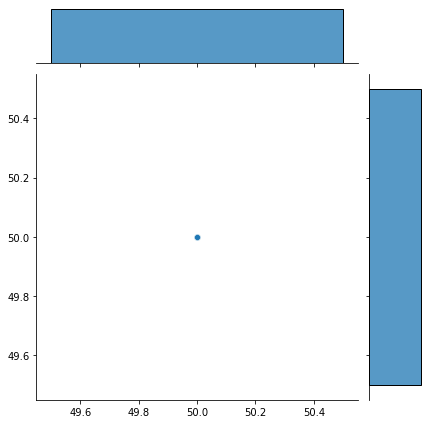

In [13]:
sns.jointplot(width, height)

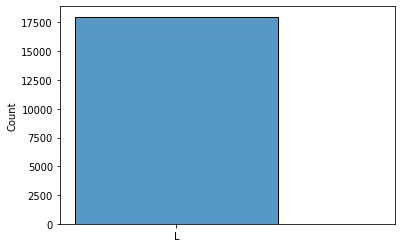

In [14]:
sns.histplot(channels)

In [15]:
print(np.max(np.array(sample_pic)))
print(np.min(np.array(sample_pic)))

255
0


In [16]:
train_data=[]
test_data=[]

In [17]:
for subDir in range(20):
  for pic in os.listdir(train_dir+"/"+str(subDir)):
    train_data.append([np.asarray(Image.open(str(train_dir+"/"+str(subDir)+"/"+pic))).astype("float32"), subDir])


for subDir in range(20):
  for pic in os.listdir(test_dir+"/"+str(subDir)):
    test_data.append([np.asarray(Image.open(str(test_dir+"/"+str(subDir)+"/"+pic))).astype("float32"), subDir])

In [18]:
train_data = [[x[0]/255,x[1]] for x in train_data]

In [19]:
test_data = [[x[0]/255,x[1]] for x in test_data]

In [20]:
random.shuffle(train_data)
random.shuffle(test_data)

In [21]:
def plot_defects(image, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(17, 17))
    n = 0
    for i in range(rows):
        for j in range(cols):
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(image[n][0])
            n += 1

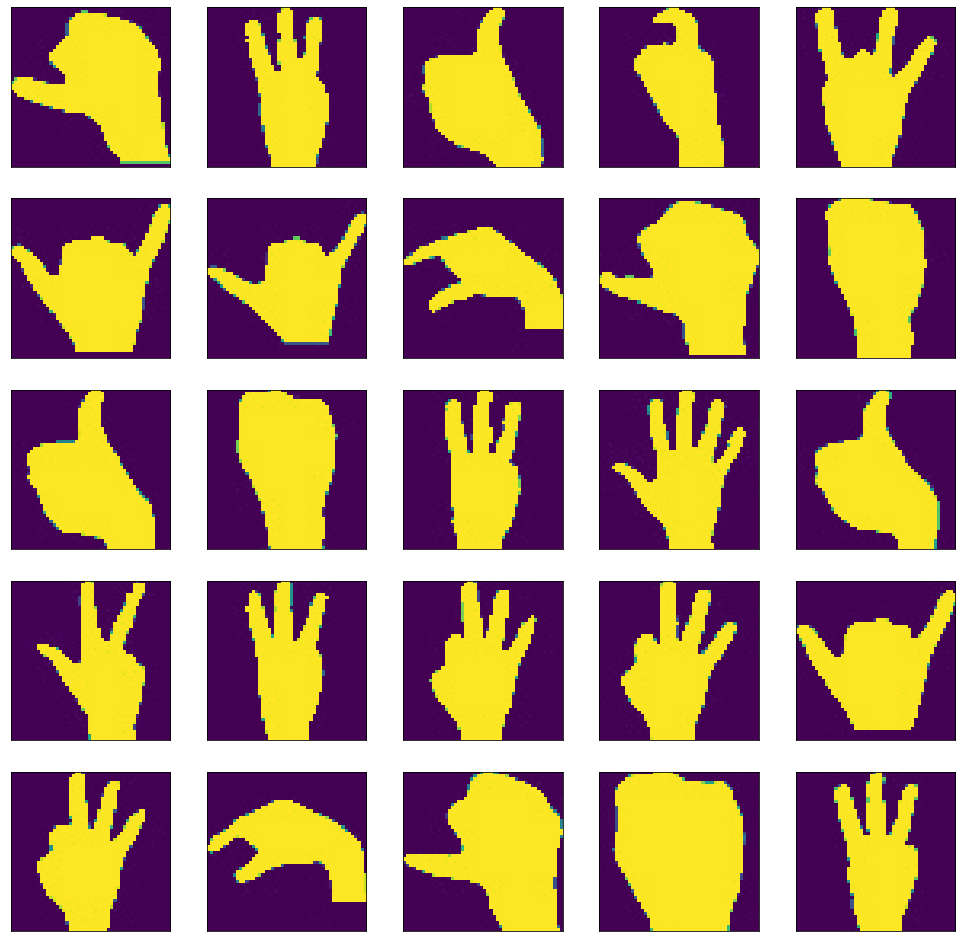

In [22]:
plot_defects(train_data, 5, 5)

In [23]:
xtrain=[x[0] for x in train_data]
ytrain=to_categorical([x[1] for x in train_data])

In [24]:
xtrain=np.array(xtrain).reshape(-1,50,50,1)

In [25]:
len(ytrain[0])

20

In [26]:
xtest=[x[0] for x in test_data]
ytest=[x[1] for x in test_data]

In [27]:
xtest=np.array(xtest).reshape(-1,50,50,1)

In [28]:
es=EarlyStopping(patience=5)

In [29]:
model = Sequential()

model.add(Conv2D(32, activation="relu", kernel_size=(5,5)))
model.add(MaxPool2D(5,5))

model.add(Conv2D(64, activation="relu", kernel_size=(3,3)))
model.add(MaxPool2D(5,5))

model.add(Flatten())

model.add(Dense(32, activation="relu"))

model.add(Dense(20, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="rmsprop")

In [30]:
model.fit(xtrain, ytrain, validation_split=.1, callbacks=[es])

507/507 [==============================] - 15s 8ms/step - loss: 0.4714 - accuracy: 0.8815 - val_loss: 0.0036 - val_accuracy: 0.9989


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2

In [37]:
prediction=np.argmax(model.predict(xtest), axis=-1)

In [40]:
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       310
           1       1.00      1.00      1.00       300
           2       1.00      1.00      1.00       301
           3       1.00      1.00      1.00       300
           4       0.94      0.99      0.96       283
           5       1.00      1.00      1.00       300
           6       0.99      1.00      1.00       298
           7       1.00      0.97      0.99       308
           8       1.00      0.97      0.99       308
           9       0.97      1.00      0.99       292
          10       1.00      1.00      1.00       300
          11       1.00      1.00      1.00       301
          12       1.00      1.00      1.00       300
          13       1.00      1.00      1.00       300
          14       1.00      1.00      1.00       300
          15       1.00      1.00      1.00       300
          16       1.00      1.00      1.00       299
          17       1.00    

In [41]:
print(confusion_matrix(prediction, ytest))

[[300   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0 300   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 281   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0 298   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 300   0   8   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   8   0   0   0 300   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0 292   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 300   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 300   0   0   0   0